# **Manipulate And Analyze Data**

In [10]:
import numpy as np
import pandas as pd
import re
import sklearn
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plot
import seaborn as sb

In [11]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [12]:
# printing the stopwords in English
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [13]:
train_dataset = pd.read_csv('/content/train.csv')

In [14]:
train_dataset.shape

(20800, 5)

In [15]:
test_dataset = pd.read_csv('/content/test.csv')

In [16]:
test_dataset.shape

(5200, 4)

In [17]:
submit_dataset = pd.read_csv('/content/submit.csv')

In [18]:
submit_dataset.shape

(5200, 2)

**Print the first 10 rows of the Train.csv data**

In [19]:
train_dataset.head(10)

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
6,6,Life: Life Of Luxury: Elton John’s 6 Favorite ...,NaN,Ever wonder how Britain’s most iconic pop pian...,1
7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
8,8,Excerpts From a Draft Script for Donald Trump’...,NaN,Donald J. Trump is scheduled to make a highly ...,0
9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0


**Randomly print 5 id** 

In [20]:
train_dataset.sample(5)

,id,title,author,text,label
341,341,"Giant Lynx Makes The Most Adorable Sound, When...",Dikran Arakelian (noreply@blogger.com),"Share on Facebook When you think of a Lynx, ch...",1
1396,1396,Report: Tamron Hall Leaves NBC News over Megyn...,Breitbart News,Report claims that NBC anchor Tamron Hall turn...,0
20124,20124,U-M’s New ‘Chief Diversity Officer’ Will Colle...,Henry Wolff,U-M’s New ‘Chief Diversity Officer’ Will Colle...,1
14018,14018,President Obama Urges Mutual Respect From Prot...,Mark Landler and Nicholas Fandos,MADRID — President Obama on Sunday urged th...,0
10152,10152,Comment on Hollyweird Clinton supporter was so...,Dr. Eowyn,First-World Problems. Poor Anna Kendrick… \nIn...,1


Print last 10 rows of the Train.csv data

In [21]:
train_dataset.tail()

,id,title,author,text,label
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1
20799,20799,What Keeps the F-35 Alive,David Swanson,"David Swanson is an author, activist, journa...",1


In [22]:
train_dataset.describe()

,id,label
count,20800.000000,20800.000000
mean,10399.500000,0.500625
std,6004.587135,0.500012
min,0.000000,0.000000
25%,5199.750000,0.000000
50%,10399.500000,1.000000
75%,15599.250000,1.000000
max,20799.000000,1.000000


**Print the first 10 rows of the Test.csv data**

In [23]:
test_dataset.head(10)

,id,title,author,text
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning..."
1,20801,Russian warships ready to strike terrorists ne...,NaN,Russian warships ready to strike terrorists ne...
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different..."
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...
5,20805,Trump is USA's antique hero. Clinton will be n...,NaN,Trump is USA's antique hero. Clinton will be n...
6,20806,Pelosi Calls for FBI Investigation to Find Out...,Pam Key,"Sunday on NBC’s “Meet the Press,” House Minori..."
7,20807,Weekly Featured Profile – Randy Shannon,Trevor Loudon,You are here: Home / *Articles of the Bound* /...
8,20808,Urban Population Booms Will Make Climate Chang...,NaN,Urban Population Booms Will Make Climate Chang...
9,20809,NaN,cognitive dissident,don't we have the receipt?


In [24]:
test_dataset.tail()

,id,title,author,text
5195,25995,The Bangladeshi Traffic Jam That Never Ends - ...,Jody Rosen,Of all the dysfunctions that plague the world’...
5196,25996,John Kasich Signs One Abortion Bill in Ohio bu...,Sheryl Gay Stolberg,WASHINGTON — Gov. John Kasich of Ohio on Tu...
5197,25997,"California Today: What, Exactly, Is in Your Su...",Mike McPhate,Good morning. (Want to get California Today by...
5198,25998,300 US Marines To Be Deployed To Russian Borde...,NaN,« Previous - Next » 300 US Marines To Be Deplo...
5199,25999,"Awkward Sex, Onscreen and Off - The New York T...",Teddy Wayne,Perhaps you’ve seen the new TV series whose pi...


Print the first 05 rows of the Submit.csv data

In [25]:
submit_dataset.head()

,id,label
0,20800,0
1,20801,1
2,20802,0
3,20803,1
4,20804,1


In [26]:
submit_dataset.tail()

,id,label
5195,25995,0
5196,25996,1
5197,25997,0
5198,25998,1
5199,25999,0


In [27]:
data_sub = train_dataset[['title', 'label']]
data_sub.head()

,title,label
0,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",0
2,Why the Truth Might Get You Fired,1
3,15 Civilians Killed In Single US Airstrike Hav...,1
4,Iranian woman jailed for fictional unpublished...,1


In [28]:
data_sub= data_sub.dropna()
data_sub= data_sub.reset_index()
data_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20242 entries, 0 to 20241
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   index   20242 non-null  int64 
 1   title   20242 non-null  object
 2   label   20242 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 474.5+ KB


**Visualizing and plot the count of 'Label' column from the dataset**

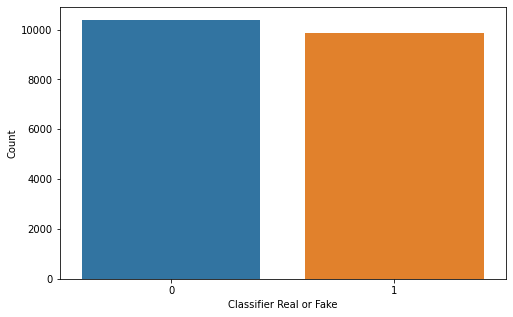

In [29]:
plot.figure(figsize=(8,5))
sb.countplot(x='label', data=data_sub)
plot.xlabel('Classifier Real or Fake')
plot.ylabel('Count')
plot.show()

**Check and count the missing values in the  train.csv dataset**

In [30]:
train_dataset.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [31]:
test_dataset.isnull().sum()

id          0
title     122
author    503
text        7
dtype: int64

**Imputation** has performed here not exactly replace with words rather i replace missing values with empty string

In [32]:
train_dataset = train_dataset.fillna('')

**Re-Check and count the missing values in the train.csv dataset**

In [33]:
train_dataset.isnull().sum()

id        0
title     0
author    0
text      0
label     0
dtype: int64

**Merging the author and  title column of train.csv dataset**

In [34]:
train_dataset['Combined_column'] = train_dataset['author']+' '+ train_dataset['title'] # +' '+ train_dataset['text']

In [35]:
print(train_dataset['Combined_column'])

0        Darrell Lucus House Dem Aide: We Didn’t Even S...
1        Daniel J. Flynn FLYNN: Hillary Clinton, Big Wo...
2        Consortiumnews.com Why the Truth Might Get You...
3        Jessica Purkiss 15 Civilians Killed In Single ...
4        Howard Portnoy Iranian woman jailed for fictio...
                               ...                        
20795    Jerome Hudson Rapper T.I.: Trump a ’Poster Chi...
20796    Benjamin Hoffman N.F.L. Playoffs: Schedule, Ma...
20797    Michael J. de la Merced and Rachel Abrams Macy...
20798    Alex Ansary NATO, Russia To Hold Parallel Exer...
20799              David Swanson What Keeps the F-35 Alive
Name: Combined_column, Length: 20800, dtype: object


**Separating data and label from train.csv dataset**

In [36]:
X = train_dataset.drop(columns='label', axis=1)
Y = train_dataset['label']

In [37]:
print(X)

          id                                              title  \
0          0  House Dem Aide: We Didn’t Even See Comey’s Let...   
1          1  FLYNN: Hillary Clinton, Big Woman on Campus - ...   
2          2                  Why the Truth Might Get You Fired   
3          3  15 Civilians Killed In Single US Airstrike Hav...   
4          4  Iranian woman jailed for fictional unpublished...   
...      ...                                                ...   
20795  20795  Rapper T.I.: Trump a ’Poster Child For White S...   
20796  20796  N.F.L. Playoffs: Schedule, Matchups and Odds -...   
20797  20797  Macy’s Is Said to Receive Takeover Approach by...   
20798  20798  NATO, Russia To Hold Parallel Exercises In Bal...   
20799  20799                          What Keeps the F-35 Alive   

                                          author  \
0                                  Darrell Lucus   
1                                Daniel J. Flynn   
2                             Consortiu

In [38]:
print(Y)

0        1
1        0
2        1
3        1
4        1
        ..
20795    0
20796    0
20797    0
20798    1
20799    1
Name: label, Length: 20800, dtype: int64


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# **Stemming** 
A process of reducing a word to its Root word also stopwords are removed


In [ ]:
port_stem = PorterStemmer()

In [ ]:
def stemming(content):
    stemmed_content = re.sub('[^a-zA-Z]',' ',content)
    stemmed_content = stemmed_content.lower()
    stemmed_content = stemmed_content.split()
    stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
    stemmed_content = ' '.join(stemmed_content)
    return stemmed_content

In [ ]:
train_dataset['Combined_column'] = train_dataset['Combined_column'].apply(stemming)

In [ ]:
print(train_dataset['Combined_column'])

0        darrel lucu hous dem aid even see comey letter...
1        daniel j flynn flynn hillari clinton big woman...
2                   consortiumnew com truth might get fire
3        jessica purkiss civilian kill singl us airstri...
4        howard portnoy iranian woman jail fiction unpu...
                               ...                        
20795    jerom hudson rapper trump poster child white s...
20796    benjamin hoffman n f l playoff schedul matchup...
20797    michael j de la merc rachel abram maci said re...
20798    alex ansari nato russia hold parallel exercis ...
20799                            david swanson keep f aliv
Name: Combined_column, Length: 20800, dtype: object


**Separating the data and label**

In [ ]:
X = train_dataset['Combined_column'].values
Y = train_dataset['label'].values

In [ ]:
print(X)

['darrel lucu hous dem aid even see comey letter jason chaffetz tweet'
 'daniel j flynn flynn hillari clinton big woman campu breitbart'
 'consortiumnew com truth might get fire' ...
 'michael j de la merc rachel abram maci said receiv takeov approach hudson bay new york time'
 'alex ansari nato russia hold parallel exercis balkan'
 'david swanson keep f aliv']


In [ ]:
print(Y)

[1 0 1 ... 0 1 1]


In [ ]:
X.shape

(20800,)

In [ ]:
Y.shape

(20800,)

# **Vectorization** 
Converting the textual data to numerical data using TfidfVectorizer()


**Tf  => Term frequency**
 
**idf => Inverse Document frequency**

In [ ]:
vectorizer = TfidfVectorizer()
vectorizer.fit(X)

X = vectorizer.transform(X)

In [ ]:
print(X)

  (0, 15686)	0.28485063562728646
  (0, 13473)	0.2565896679337957
  (0, 8909)	0.3635963806326075
  (0, 8630)	0.29212514087043684
  (0, 7692)	0.24785219520671603
  (0, 7005)	0.21874169089359144
  (0, 4973)	0.233316966909351
  (0, 3792)	0.2705332480845492
  (0, 3600)	0.3598939188262559
  (0, 2959)	0.2468450128533713
  (0, 2483)	0.3676519686797209
  (0, 267)	0.27010124977708766
  (1, 16799)	0.30071745655510157
  (1, 6816)	0.1904660198296849
  (1, 5503)	0.7143299355715573
  (1, 3568)	0.26373768806048464
  (1, 2813)	0.19094574062359204
  (1, 2223)	0.3827320386859759
  (1, 1894)	0.15521974226349364
  (1, 1497)	0.2939891562094648
  (2, 15611)	0.41544962664721613
  (2, 9620)	0.49351492943649944
  (2, 5968)	0.3474613386728292
  (2, 5389)	0.3866530551182615
  (2, 3103)	0.46097489583229645
  :	:
  (20797, 13122)	0.2482526352197606
  (20797, 12344)	0.27263457663336677
  (20797, 12138)	0.24778257724396507
  (20797, 10306)	0.08038079000566466
  (20797, 9588)	0.174553480255222
  (20797, 9518)	0.295420

**X_train => Training Data**

**X_test  => Testing  Data**

**Y_train => Labels for X_train data**

**Y_test  => Labels for X_test data** 

# **Logistic Regression Model (default Threshold)**

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify=Y, random_state=2)

In [ ]:
Log_Reg_model = LogisticRegression()

**Sigmoid function**

In [ ]:
Log_Reg_model.fit(X_train, Y_train)

LogisticRegression()

###**Save Trained Model as .sav (using pickle)**

In [ ]:
import pickle
filename = 'Log_Reg_model_default.sav'
pickle.dump(Log_Reg_model, open(filename, 'wb'))
 
 
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, Y_test)
print('Accuracy  = ',"%.2f" % (result*100),"%")

Accuracy  =  97.91 %


In [ ]:
pd.read_pickle('/content/Log_Reg_model_default.sav', compression='infer')

LogisticRegression()

In [ ]:
loaded_model.predict(X_test)

array([1, 0, 1, ..., 1, 1, 0])

In [ ]:
loaded_model.coef_

array([[0.        , 0.02073128, 0.07379171, ..., 0.01058941, 0.08030947,
        0.11713801]])

In [ ]:
loaded_model.intercept_

array([1.90273003])

In [ ]:
train_dataset.head(10)

,id,title,author,text,label,Combined_column
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,darrel lucu hous dem aid even see comey letter...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,daniel j flynn flynn hillari clinton big woman...
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,consortiumnew com truth might get fire
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,jessica purkiss civilian kill singl us airstri...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,howard portnoy iranian woman jail fiction unpu...
5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0,daniel nussbaum jacki mason hollywood would lo...
6,6,Life: Life Of Luxury: Elton John’s 6 Favorite ...,,Ever wonder how Britain’s most iconic pop pian...,1,life life luxuri elton john favorit shark pict...
7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0,alissa j rubin beno hamon win french socialist...
8,8,Excerpts From a Draft Script for Donald Trump’...,,Donald J. Trump is scheduled to make a highly ...,0,excerpt draft script donald trump q ampa black...
9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0,megan twohey scott shane back channel plan ukr...


###**Take User Input and check news either Real or Fake**

In [ ]:
def label(l):
  if l == 1:
    return "Fake News"
  else:
    return "Real News"

def test_model(title,author):
  
  author_title = author+' '+ title # +' '+ 'text'
  test_news = {"text" : [author_title]}
  test_news = pd.DataFrame(test_news)
  test_news["text"]   = test_news["text"].apply(stemming)
  stemmed_content = test_news["text"] 

  new_test_vec = vectorizer.transform(stemmed_content)
  print(new_test_vec)
  prediction = loaded_model.predict(new_test_vec)
  print(prediction)
  return print("Prediction : ",label(prediction[0]))



In [ ]:
print("Enter ID : ")
id = int(input())

print("Enter Title : ")
title = str(input())

print("Enter Author : ")
author = str(input())

print("Enter Text : ")
text = str(input())

test_model(title,author)

Enter ID : 
2
Enter Title : 
Why the Truth Might Get You Fired	
Enter Author : 
Consortiumnews.com
Enter Text : 
null
  (0, 15611)	0.41544962664721613
  (0, 9620)	0.49351492943649944
  (0, 5968)	0.3474613386728292
  (0, 5389)	0.3866530551182615
  (0, 3103)	0.46097489583229645
  (0, 2943)	0.3179886800654691
[1]
Prediction :  Fake News


###**Accuracy Checking**

In [ ]:
Y_pred = Log_Reg_model.predict(X_test[0:4160])

In [ ]:
from sklearn import metrics
print(metrics.classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.99      0.96      0.98      2077
           1       0.97      0.99      0.98      2083

    accuracy                           0.98      4160
   macro avg       0.98      0.98      0.98      4160
weighted avg       0.98      0.98      0.98      4160



In [ ]:
X_train_predict = Log_Reg_model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_predict, Y_train)

In [ ]:
print('Accuracy score of the train.csv data : ', training_data_accuracy)

Accuracy score of the train.csv data :  0.9865985576923076


###**Train data accuracy percentage**

In [ ]:
train_accuracy_percent = training_data_accuracy * 100
print('Accuracy  = ',"%.2f" % train_accuracy_percent , '%')

Accuracy  =  98.66 %


###**Accuracy score on test data**

In [ ]:
X_test_predict = Log_Reg_model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_predict, Y_test)

In [ ]:
print('Accuracy score of the test data = ', test_data_accuracy)

Accuracy score of the test data =  0.9790865384615385


In [ ]:
test_accuracy_percent = test_data_accuracy * 100
print('Accuracy  = ',"%.2f" % test_accuracy_percent , '%')

Accuracy  =  97.91 %


###**Save Trained Model as .json file**

In [ ]:
from tensorflow.keras.models import Sequential, model_from_json
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import load_model
from sklearn import metrics
import numpy
import os
# Compile model
Log_Reg_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# serialize model to JSON
model_json = Log_Reg_model.to_json()
with open("default_log_reg.json", "w") as json_file:
    json_file.write(model_json)

In [ ]:
# load json and create model
json_file = open('default_log_reg.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

# evaluate loaded model on test data
loaded_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
#score = loaded_model.evaluate(X_test, Y_test, verbose=0)
#print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))
loaded_model
#loaded_model_json.summary()

###**Checking a row (using label) is correct or not**

In [ ]:
row = int(input('Enter Which row you want to check : '))
X_new_test_data = X_test[row]

prediction = Log_Reg_model.predict(X_new_test_data)

print(prediction)

if (prediction == 0):
  print('The news is Real')
else:
  print('The news is Fake')


print(Y_test[row])

if (Y_test[row]==0):
  print('Originally The news is Real')
else:
  print('Originally The news is Fake')

if (prediction==Y_test[row]):
  print('\nThe Trained Logistic regression Model predicts correctly')
else:
  print('\nThe Trained Logistic regression Model predicts wrong')

Enter Which row you want to check : 1056
[0]
The news is Real
0
Originally The news is Real

The Trained Logistic regression Model predicts correctly


In [ ]:
print(X_test)

In [ ]:
X_test.shape

(4160, 17128)

In [ ]:
predict_value = Log_Reg_model.predict(X_test[0:4160])

In [ ]:
print(predict_value)

[1 0 1 ... 1 1 0]


In [ ]:
from sklearn import metrics

###**Confusion Matrix (default Threshold)**

In [ ]:
cf_matrix = confusion_matrix(Y_test, predict_value)
print(cf_matrix)

[[2004   73]
 [  14 2069]]


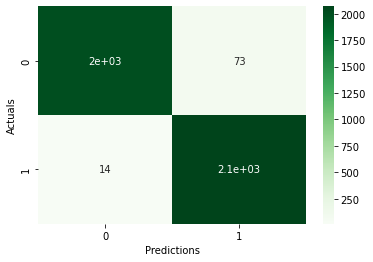

In [ ]:
sb.heatmap(cf_matrix, annot=True, cmap='Greens')
plot.ylabel('Actuals')
plot.xlabel('Predictions')
plot.show()

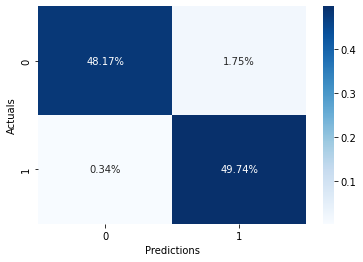

In [ ]:
sb.heatmap(cf_matrix/np.sum(cf_matrix),annot=True,fmt='.2%', cmap='Blues')
plot.ylabel('Actuals')
plot.xlabel('Predictions')
plot.show()

In [ ]:
TN = cf_matrix[0][0]
FP = cf_matrix[0][1]
FN = cf_matrix[1][0]
TP = cf_matrix[1][1]

In [ ]:
print(TN)
print(FP)
print(FN)
print(TP)

2004
73
14
2069


**Accuracy**

In [ ]:
accuracy = ((TP + TN)/(TP+FP+FN+TN)) * 100
print('Accuracy  = ',"%.2f" % accuracy , '%')

Accuracy  =  97.91 %


**Recall / Sensitivity**

In [ ]:
recall = TP/(TP+FN)
print('Recall  = ',"%.2f" % recall)

Recall  =  0.99


**Precision**

In [ ]:
precision = TP/(TP+FP)
print('Precision  = ',"%.2f" % precision)

Precision  =  0.97


**F-measure**

In [ ]:
F_measure = (2*recall*precision)/(recall+precision)
print('F-measure  = ',"%.2f" % F_measure)

F-measure  =  0.98


**True_Positive_Rate**

In [ ]:
True_Positive_Rate = TP/(TP+FN)
print('True Positive Rate  = ',"%.2f" % True_Positive_Rate)

True Positive Rate  =  0.99


**False Negative Rate**

In [ ]:
False_Negative_Rate = FN /(TP+FN)
print('False Negativee Rate  = ',"%.2f" % False_Negative_Rate)

False Negativee Rate  =  0.01


**True Negative Rate**

In [ ]:
True_Negative_Rate = TN /(TN+FP)
print('True Negative Rate  = ',"%.2f" % True_Negative_Rate)

True Negative Rate  =  0.96


**False Positive Rate**

In [ ]:
False_Positive_Rate = FP/(FP+TN)
print('False Positive Rate  = ',"%.2f" % False_Positive_Rate)

False Positive Rate  =  0.04


**Specificity**

In [ ]:
Specificity = TN/(FP+TN)
print('Specificity  = ',"%.2f" % Specificity)

Specificity  =  0.96


###**Precision-Recall Curve**

In [ ]:
from sklearn.metrics import precision_recall_curve

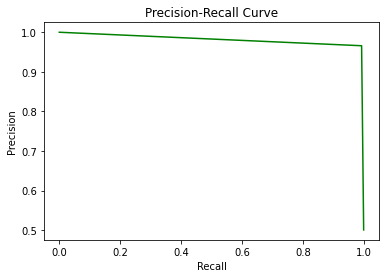

In [ ]:
precision, recall, thresholds = precision_recall_curve(Y_test, predict_value)

#create precision recall curve
fig, ax = plot.subplots()
ax.plot(recall, precision, color='green')

#add axis labels to plot
ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

#display plot
plot.show()

###**ROC (receiver operating characteristic) Curve**

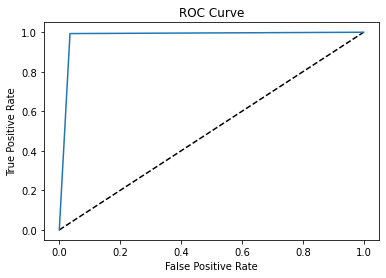

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
from sklearn.metrics import roc_curve

FPR, TPR, Thresholds = roc_curve(Y_test, predict_value)
plot.plot([0, 1], [0, 1], 'k--')
plot.plot(FPR, TPR)
plot.xlabel('False Positive Rate')
plot.ylabel('True Positive Rate')
plot.title('ROC Curve')
plot.show()

###**AUC (Area Under The Curve)**

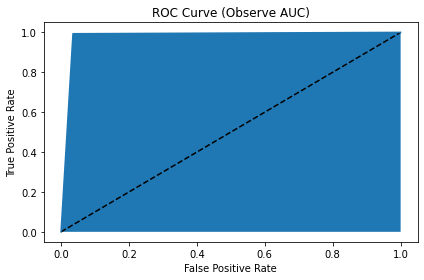

In [ ]:
FPR, TPR, Thresholds = roc_curve(Y_test, predict_value)

# Plot ROC curve
plot.plot([0, 1], [0, 1], 'k--')
plot.plot(FPR, TPR)
plot.xlabel('False Positive Rate')
plot.ylabel('True Positive Rate')
plot.title('ROC Curve (Observe AUC)')

plot.fill_between(FPR, TPR)
plot.tight_layout()
plot.show()

###**AUC Score**

In [ ]:
auc = roc_auc_score(Y_test, predict_value)
print('AUC score =  %.5f' % auc)
print('Model is  =  %.2f' % (auc*100) ,' % accurate')

AUC score =  0.97907
Model is  =  97.91  % accurate


# **Logistic Regression (Optimal Threshold)**

In [ ]:
class LogisticRegressionWithThreshold(LogisticRegression):
    def predict(self, X, threshold=None):
        if threshold == None: # If no threshold passed in, simply call the base class predict, effectively threshold=0.5
            return LogisticRegression.predict(self, X)
        else:
            y_scores = LogisticRegression.predict_proba(self, X)[:, 1]
            y_pred_with_threshold = (y_scores >= threshold).astype(int)

            return y_pred_with_threshold


    def threshold_from_optimal_f_score(self, X, y):
            y_scores = LogisticRegression.predict_proba(self, X)[:, 1]
            precisions, recalls, thresholds = precision_recall_curve(y, y_scores)

            fscores = (2 * precisions * recalls) / (precisions + recalls)
            
            optimal_idx = np.argmax(fscores)
            
            return thresholds[optimal_idx], fscores[optimal_idx]



In [ ]:
lrt = LogisticRegressionWithThreshold()
lrt.fit(X_train, Y_train)

threshold, optimal_f1_score = lrt.threshold_from_optimal_f_score(X_train, Y_train)
y_pred = lrt.predict(X_test, threshold)

threshold, optimal_f1_score,y_pred


(0.6117637453460651, 0.990800312669112, array([1, 0, 1, ..., 1, 1, 0]))

**Confusion Matrix (Optimal Threshold)**

In [ ]:
cf_matrix = confusion_matrix(Y_test, y_pred)
print(cf_matrix)

[[2046   31]
 [  27 2056]]


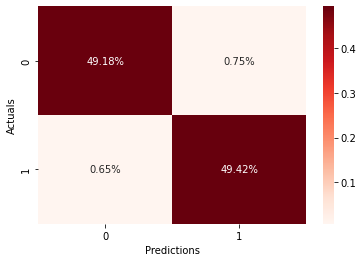

In [ ]:
sb.heatmap(cf_matrix/np.sum(cf_matrix),annot=True,fmt='.2%', cmap='Reds')
plot.ylabel('Actuals')
plot.xlabel('Predictions')
plot.show()

In [ ]:
TN = cf_matrix[0][0]
FP = cf_matrix[0][1]
FN = cf_matrix[1][0]
TP = cf_matrix[1][1]

In [ ]:
print(TN)
print(FP)
print(FN)
print(TP)

2046
31
27
2056


In [ ]:
accuracy = ((TP + TN)/(TP+FP+FN+TN)) * 100
print('Accuracy  = ',"%.2f" % accuracy , '%')

Accuracy  =  98.61 %


In [ ]:
recall = TP/(TP+FN)
print('Recall  = ',"%.2f" % recall)

Recall  =  0.99


In [ ]:
precision = TP/(TP+FP)
print('Precision  = ',"%.2f" % precision)

Precision  =  0.99


In [ ]:
F_measure = (2*recall*precision)/(recall+precision)
print('F-measure  = ',"%.2f" % F_measure)

F-measure  =  0.99


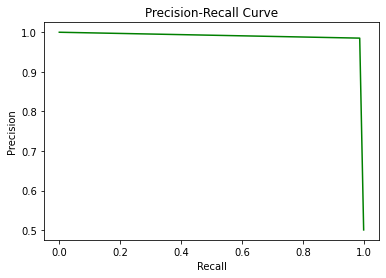

In [ ]:
precision, recall, thresholds = precision_recall_curve(Y_test, y_pred)

#create precision recall curve
fig, ax = plot.subplots()
ax.plot(recall, precision, color='green')

#add axis labels to plot
ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

#display plot
plot.show()

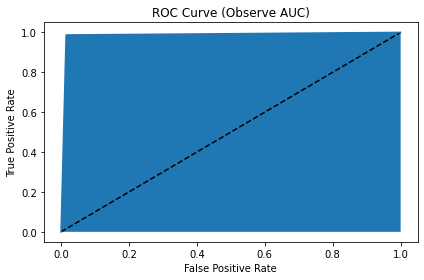

In [ ]:
FPR, TPR, Thresholds = roc_curve(Y_test, y_pred)

# Plot ROC curve
plot.plot([0, 1], [0, 1], 'k--')
plot.plot(FPR, TPR)
plot.xlabel('False Positive Rate')
plot.ylabel('True Positive Rate')
plot.title('ROC Curve (Observe AUC)')

plot.fill_between(FPR, TPR)
plot.tight_layout()
plot.show()

In [ ]:
auc = roc_auc_score(Y_test, y_pred)
print('AUC score =  %.5f' % auc)
print('Model is  =  %.2f' % (auc*100) ,' % accurate')

AUC score =  0.98606
Model is  =  98.61  % accurate


**Observe precision    recall  f1-score (optimal threshold**

In [ ]:
from sklearn import metrics
print(metrics.classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2077
           1       0.99      0.99      0.99      2083

    accuracy                           0.99      4160
   macro avg       0.99      0.99      0.99      4160
weighted avg       0.99      0.99      0.99      4160

